# Importing the required libraries

In [ ]:
!pip install tensorflow --upgrade

In [1]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
from keras.optimizers import Adam #opt imizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

# Load data

In [2]:
(x_train, y_train), (x_test, y_test)=mnist.load_data () #splitting the mnist data into train and test

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

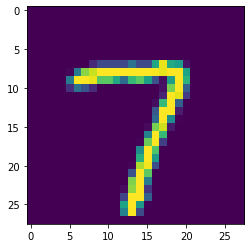

In [5]:
plt.imshow(x_train[5100])     #ploting the index=image

In [6]:
np.argmax(y_train[5100])

0

# Reshaping Dataset

In [7]:
#Reshaping to format which CNN expects (batch, height, width, channels)
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

In [8]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
Y_train[0]


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Applying One Hot Encoding

In [10]:
number_of_classes = 10  #storing the no of classes in a variable

In [11]:
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

# Add CNN Layers

In [12]:
#create model
model=Sequential ()

In [13]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [14]:
#flatten the dimension of the image
model.add(Flatten())

In [15]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

# Compiling the model

In [16]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [17]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

# Train the model

In [18]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 205s 109ms/step - loss: 0.2771 - accuracy: 0.9478 - val_loss: 0.1038 - val_accuracy: 0.9670
Epoch 2/5
1875/1875 [==============================] - 196s 104ms/step - loss: 0.0732 - accuracy: 0.9775 - val_loss: 0.0886 - val_accuracy: 0.9731
Epoch 3/5
1875/1875 [==============================] - 195s 104ms/step - loss: 0.0520 - accuracy: 0.9838 - val_loss: 0.0821 - val_accuracy: 0.9762
Epoch 4/5
1875/1875 [==============================] - 195s 104ms/step - loss: 0.0394 - accuracy: 0.9880 - val_loss: 0.0918 - val_accuracy: 0.9756
Epoch 5/5
1875/1875 [==============================] - 196s 104ms/step - loss: 0.0296 - accuracy: 0.9907 - val_loss: 0.1174 - val_accuracy: 0.9738


# Observing the metrics

In [19]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.1174357682466507, 0.973800003528595]


In [21]:
prediction = model.predict(x_test[:4])
print(prediction)

1/1 [==============================] - 0s 91ms/step
[[1.86886205e-12 8.89105504e-18 2.13110551e-09 1.51576705e-05
  2.36352183e-16 1.66573963e-15 3.59048912e-18 9.99984860e-01
  6.00054284e-10 3.68534760e-12]
 [5.29971487e-07 1.49486681e-08 9.97740984e-01 9.76836382e-05
  1.12609672e-12 2.64959416e-10 2.15814775e-03 4.19446379e-12
  2.72716602e-06 2.01679180e-15]
 [2.26579555e-08 9.99982595e-01 6.08558310e-07 2.33858211e-10
  1.27251525e-07 3.58730091e-07 8.44555398e-11 3.70535165e-11
  1.63394980e-05 5.49801144e-13]
 [1.00000000e+00 1.22846010e-14 6.50287185e-11 3.40224030e-11
  3.47837048e-13 1.16291206e-10 3.74847403e-10 7.14022618e-14
  1.36747560e-13 2.80877904e-10]]


In [22]:
import numpy

print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
